In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

from api_keys import api_key

from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

units = "metric"

In [2]:
# List for holding lat_lngs and cities

cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=2000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=2000)
# Create tuples of lats and lngs
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    # lat_lng[0] - latitude
    # lat_lng[1] - longitude
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
len(cities)

764

In [3]:
cities_df = pd.DataFrame({"City": cities})
cities_df['Cloudiness']= ""
cities_df['Country']= ""
cities_df['Date']= ""
cities_df['Humidity']= ""
cities_df['Lat']= ""
cities_df['Lng']= ""
cities_df['Max Temp']= ""
cities_df['Wind Speed']= ""

cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,airai,,,,,,,,
1,high level,,,,,,,,
2,anadyr,,,,,,,,
3,bubaque,,,,,,,,
4,san patricio,,,,,,,,


In [4]:
base_url = "http://api.openweathermap.org/data/2.5/weather?appid={0}&q={1}&units={2}"
base_url

'http://api.openweathermap.org/data/2.5/weather?appid={0}&q={1}&units={2}'

In [5]:
for index, row in cities_df.iterrows():
    city_url = base_url.format(api_key, row['City'], units)
    city_request = requests.get(city_url).json()
    
    try:
        
        cities_df.loc[index, 'Cloudiness'] = city_request['clouds']['all']
        cities_df.loc[index, 'Country'] = city_request['sys']['country']
        cities_df.loc[index, 'Date'] = city_request['dt']
        cities_df.loc[index, 'Humidity'] = city_request['main']['humidity']
        cities_df.loc[index, 'Lat'] = city_request['coord']['lat']
        cities_df.loc[index, 'Lng'] = city_request['coord']['lon']
        cities_df.loc[index, 'Max Temp'] = city_request['main']['temp_max']
        cities_df.loc[index, 'Wind Speed'] = city_request['wind']['speed']
        
        print("Processing Record " + str(index+1) + " | " + str(row['City']))
   
    except(KeyError, IndexError):
        print("City not found. Skipping...")
    
    

Processing Record 1 | airai
Processing Record 2 | high level
Processing Record 3 | anadyr
Processing Record 4 | bubaque
Processing Record 5 | san patricio
Processing Record 6 | mataura
Processing Record 7 | alta floresta
Processing Record 8 | albany
Processing Record 9 | saint-philippe
Processing Record 10 | zyryanovsk
Processing Record 11 | hilo
Processing Record 12 | butaritari
Processing Record 13 | tasiilaq
City not found. Skipping...
Processing Record 15 | lavrentiya
Processing Record 16 | barrow
Processing Record 17 | punta arenas
Processing Record 18 | hermanus
Processing Record 19 | nadym
Processing Record 20 | ancud
Processing Record 21 | ushuaia
Processing Record 22 | roald
Processing Record 23 | georgetown
Processing Record 24 | avarua
Processing Record 25 | souillac
Processing Record 26 | carnarvon
Processing Record 27 | waipawa
Processing Record 28 | puerto madryn
Processing Record 29 | rikitea
City not found. Skipping...
Processing Record 31 | port elizabeth
Processing Re

Processing Record 256 | vitina
Processing Record 257 | zwedru
Processing Record 258 | fare
Processing Record 259 | haines junction
Processing Record 260 | burnie
City not found. Skipping...
Processing Record 262 | auki
Processing Record 263 | miri
Processing Record 264 | martigny
Processing Record 265 | salinopolis
Processing Record 266 | fenoarivo atsinanana
Processing Record 267 | imphal
Processing Record 268 | gat
Processing Record 269 | hualmay
Processing Record 270 | ramanuj ganj
Processing Record 271 | paka
Processing Record 272 | bage
Processing Record 273 | grand gaube
Processing Record 274 | leshukonskoye
Processing Record 275 | rajapolah
Processing Record 276 | pimenta bueno
City not found. Skipping...
City not found. Skipping...
Processing Record 279 | noumea
Processing Record 280 | kita
Processing Record 281 | turukhansk
Processing Record 282 | kediri
City not found. Skipping...
Processing Record 284 | izvestkovyy
Processing Record 285 | dudinka
Processing Record 286 | sala

Processing Record 508 | lucea
Processing Record 509 | roma
Processing Record 510 | leh
City not found. Skipping...
Processing Record 512 | labytnangi
Processing Record 513 | lumeje
Processing Record 514 | canmore
Processing Record 515 | lima
Processing Record 516 | lavumisa
Processing Record 517 | golden gate
Processing Record 518 | vrangel
Processing Record 519 | porbandar
Processing Record 520 | iralaya
Processing Record 521 | glyadyanskoye
Processing Record 522 | vila do maio
Processing Record 523 | arlit
Processing Record 524 | zaraza
City not found. Skipping...
Processing Record 526 | waddan
Processing Record 527 | kulhudhuffushi
Processing Record 528 | tecoanapa
Processing Record 529 | damietta
Processing Record 530 | ruthin
City not found. Skipping...
Processing Record 532 | canchungo
Processing Record 533 | smidovich
Processing Record 534 | veshenskaya
Processing Record 535 | moroni
Processing Record 536 | wladyslawowo
Processing Record 537 | brentwood
City not found. Skipping.

Processing Record 760 | zonguldak
Processing Record 761 | yulin
Processing Record 762 | suzdal
Processing Record 763 | healdsburg
Processing Record 764 | ilhabela


In [6]:
cities_df.count()

City          764
Cloudiness    764
Country       764
Date          764
Humidity      764
Lat           764
Lng           764
Max Temp      764
Wind Speed    764
dtype: int64

In [7]:
cities_df = cities_df.dropna(how='any')
cities_df.count()

City          764
Cloudiness    764
Country       764
Date          764
Humidity      764
Lat           764
Lng           764
Max Temp      764
Wind Speed    764
dtype: int64

In [10]:
cities_df.head()
cities_df.to_csv(output_data_file)

In [11]:
for column in ['Cloudiness', 'Humidity', 'Lat', 'Lng', 'Max Temp', 'Wind Speed']:
    cities_df[column] = pd.to_numeric(cities_df[column])
    #print(type(cities_df[column][1]))


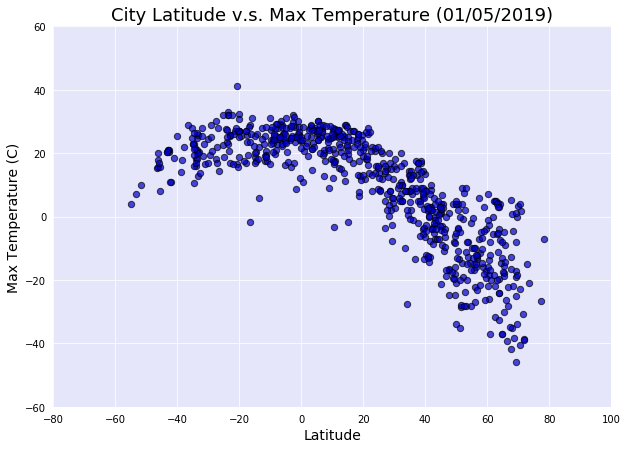

In [98]:
fig, ax = plt.subplots(figsize=(10,7))
ax.set_title("City Latitude v.s. Max Temperature (01/05/2019)", fontsize=18)
ax.scatter(cities_df['Lat'], 
            cities_df['Max Temp'], 
            marker='o', 
            facecolor='mediumblue',
            edgecolor='black',
            s=40, 
            alpha=0.7)
ax.tick_params(bottom=False, left=False)
ax.set_xlabel("Latitude", fontsize=14)
ax.set_ylabel("Max Temperature (C)", fontsize=14)
ax.set_xlim(-80, 100)
ax.set_ylim(-60,60)
ax.grid(color="white")
ax.set_facecolor(color="lavender")

ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.savefig('charts/Lat_Temp.png')

In [31]:
# Conclusion:
# The plot shows that maximum temperature reaches higher around 0 degress laitude or the equator.

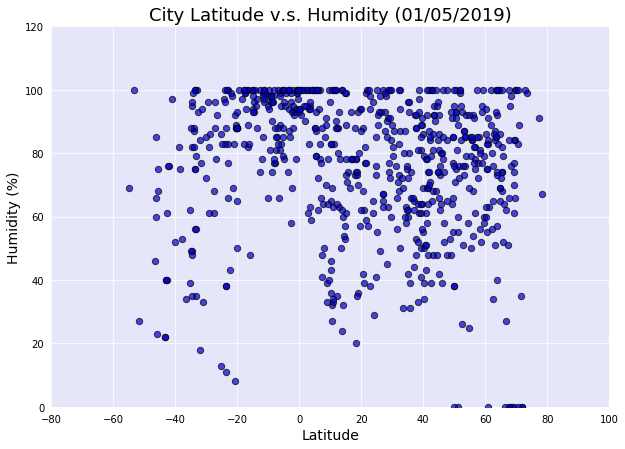

In [99]:
fig, ax = plt.subplots(figsize=(10,7))
ax.set_title("City Latitude v.s. Humidity (01/05/2019)", fontsize=18)
ax.scatter(cities_df['Lat'], 
            cities_df['Humidity'], 
            marker='o', 
            facecolor='mediumblue',
            edgecolor='black',
            s=40, 
            alpha=0.7)
# turn off tick marks
ax.tick_params(bottom=False, left=False)
ax.set_xlabel("Latitude", fontsize=14)
ax.set_ylabel("Humidity (%)", fontsize=14)
ax.set_xlim(-80, 100)
ax.set_ylim(-0,120)
ax.grid(color="white")
# set plot background color
ax.set_facecolor(color="lavender")
# make border outline invisible
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.savefig('charts/Lat_Humidity.png')

In [33]:
# Conclusion:
# According to plot, humidity level tends to be uniformly higher right around the equator and varies more as we move away from it.

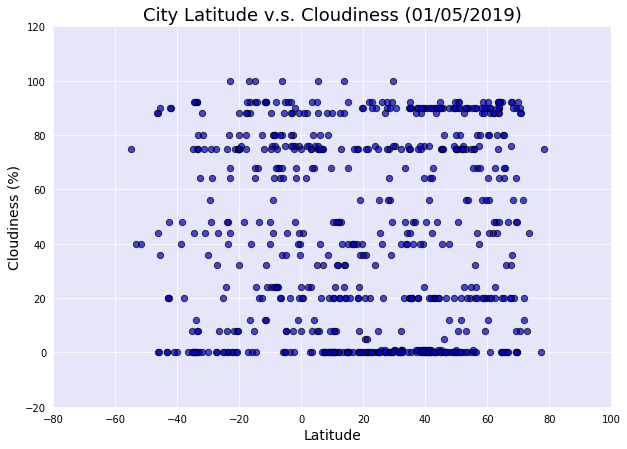

In [100]:
fig, ax = plt.subplots(figsize=(10,7))
ax.set_title("City Latitude v.s. Cloudiness (01/05/2019)", fontsize=18)
ax.scatter(cities_df['Lat'], 
            cities_df['Cloudiness'], 
            marker='o', 
            facecolor='mediumblue',
            edgecolor='black',
            s=40, 
            alpha=0.7)
ax.tick_params(bottom=False, left=False)
ax.set_xlabel("Latitude", fontsize=14)
ax.set_ylabel("Cloudiness (%)", fontsize=14)
ax.set_xlim(-80, 100)
ax.set_ylim(-20,120)
ax.grid(color="white")
ax.set_facecolor(color="lavender")

ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.savefig('charts/Lat_Cloud.png')

In [35]:
# Conclusion:
# The plot shows that the amount of clouds tends to be slightly more varied around and equater, but the difference is not very obvious.

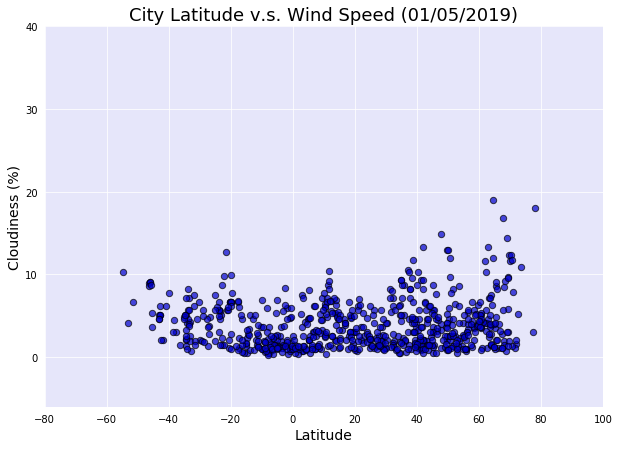

In [101]:
fig, ax = plt.subplots(figsize=(10,7))
ax.set_title("City Latitude v.s. Wind Speed (01/05/2019)", fontsize=18)
ax.scatter(cities_df['Lat'], 
            cities_df['Wind Speed'], 
            marker='o', 
            facecolor='mediumblue',
            edgecolor='black',
            s=40, 
            alpha=0.7)
ax.tick_params(bottom=False, left=False)
ax.set_xlabel("Latitude", fontsize=14)
ax.set_ylabel("Cloudiness (%)", fontsize=14)
ax.set_xlim(-80, 100)
ax.set_ylim(-6,40)
ax.grid(color="white")
ax.set_facecolor(color="lavender")

ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.savefig('charts/Lat_Wind.png')

In [37]:
# Conclusion: 
# According to the plot, wind is slower around the equator and picks up more speed as we move further away from it.

In [109]:
from IPython.display import HTML
from bs4 import BeautifulSoup as bs

In [119]:
cities_df.dropna(inplace=True)

cities_html = cities_df.to_html(classes='table table-striped')
cities_html = cities_html.replace('\n', '')

In [120]:
cities_html

'<table border="1" class="dataframe table table-striped">  <thead>    <tr style="text-align: right;">      <th></th>      <th>City</th>      <th>Cloudiness</th>      <th>Country</th>      <th>Date</th>      <th>Humidity</th>      <th>Lat</th>      <th>Lng</th>      <th>Max Temp</th>      <th>Wind Speed</th>    </tr>  </thead>  <tbody>    <tr>      <th>0</th>      <td>airai</td>      <td>24.0</td>      <td>TL</td>      <td>1546826912</td>      <td>90.0</td>      <td>-8.93</td>      <td>125.41</td>      <td>25.36</td>      <td>0.61</td>    </tr>    <tr>      <th>1</th>      <td>high level</td>      <td>92.0</td>      <td>CA</td>      <td>1546826894</td>      <td>52.0</td>      <td>58.52</td>      <td>-117.13</td>      <td>-15.85</td>      <td>3.56</td>    </tr>    <tr>      <th>2</th>      <td>anadyr</td>      <td>20.0</td>      <td>RU</td>      <td>1546822800</td>      <td>65.0</td>      <td>64.73</td>      <td>177.51</td>      <td>-13.00</td>      <td>19.00</td>    </tr>    <tr>      <

In [121]:
HTML(cities_html)

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,airai,24.0,TL,1546826912,90.0,-8.93,125.41,25.36,0.61
1,high level,92.0,CA,1546826894,52.0,58.52,-117.13,-15.85,3.56
2,anadyr,20.0,RU,1546822800,65.0,64.73,177.51,-13.00,19.00
3,bubaque,48.0,GW,1546826913,100.0,11.28,-15.83,25.53,1.36
4,san patricio,44.0,PY,1546826913,78.0,-26.98,-56.83,27.78,3.76
5,mataura,88.0,NZ,1546826914,66.0,-46.19,168.86,17.88,9.06
6,alta floresta,88.0,BR,1546826914,98.0,-9.87,-56.08,24.01,0.96
7,albany,20.0,US,1546826040,39.0,42.65,-73.75,-3.30,6.70
8,saint-philippe,75.0,CA,1546824900,62.0,45.36,-73.48,-9.00,3.60
9,zyryanovsk,0.0,KZ,1546826915,55.0,49.74,84.27,-24.72,0.91
